# 英語の頻度分析

In [1]:
using PyCall

## データの読み込み

文字数が近い
[Alice's Adventures in Wonderland by Lewis Carroll](https://www.gutenberg.org/ebooks/11)
を使用します。


In [2]:
open("Alice's Adventures in Wonderland by Lewis Carroll.txt") do f
    global all_text = read(f, String)
end

"The Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this eBook or online at\nwww.gutenberg.org. If you are not located in the United States, you\nwill have to check the laws of the country where you are located before\nusing this eBook.\n\nTitle: Alice’s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nRelease Date: January, 1991 [eBook #11]\n[Most recently updated: October 12, 2020]\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\nProduced by: Arthur DiBianca and David Widger\n\n*** START OF THE PROJECT GUTENBERG EBOOK ALICE’S ADVENTURES IN WONDERLAND ***\n\n[Illustration]\n\n\n\n\nAlice’s Adventures in Wonderland\n\nby Lewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\nConten

## 前処理

全てのツイートの文章から以下の項目について処理を行います．

1. 大文字を小文字に変換
2. Tweet IDの削除
3. 改行文字の削除
4. 約物などの記号の削除

In [3]:
text = replace(lowercase.(all_text), r"@[0-9A-Z_a-z]+\W?|[\r\n!-@\[-`{-~“”]" => s"")

"the project gutenberg ebook of alice’s adventures in wonderland by lewis carrollthis ebook is for the use of anyone anywhere in the united states andmost other parts of the world at no cost and with almost no restrictionswhatsoever you may copy it give it away or reuse it under the termsof the project gutenberg license included with this ebook or online atwwwgutenbergorg if you are not located in the united states youwill have to check the laws of the country where you are located beforeusing this ebooktitle alice’s adventures in wonderlandauthor lewis carrollrelease date january  ebook most recently updated october  language englishcharacter set encoding utfproduced by arthur dibianca and david widger start of the project gutenberg ebook alice’s adventures in wonderland illustrationalice’s adventures in wonderlandby lewis carrollthe millennium fulcrum edition contents chapter i     down the rabbithole chapter ii    the pool of tears chapter iii   a caucusrace and a long tale chapter 

## 文字数

In [4]:
length(text)

152057

## 単語のリスト

In [5]:
words = split(text)

26804-element Vector{SubString{String}}:
 "the"
 "project"
 "gutenberg"
 "ebook"
 "of"
 "alice’s"
 "adventures"
 "in"
 "wonderland"
 "by"
 "lewis"
 "carrollthis"
 "ebook"
 ⋮
 "and"
 "how"
 "tosubscribe"
 "to"
 "our"
 "email"
 "newsletter"
 "to"
 "hear"
 "about"
 "new"
 "ebooks"

## 文字のリスト

In [6]:
letters = split(text, "")

152057-element Vector{SubString{String}}:
 "t"
 "h"
 "e"
 " "
 "p"
 "r"
 "o"
 "j"
 "e"
 "c"
 "t"
 " "
 "g"
 ⋮
 "t"
 " "
 "n"
 "e"
 "w"
 " "
 "e"
 "b"
 "o"
 "o"
 "k"
 "s"

## 単語ごとにおける頻度分析

In [7]:
using StatsBase
word_counter = StatsBase.countmap(words)

Dict{SubString{String}, Int64} with 5299 entries:
  "offend"                        => 1
  "enjoy"                         => 1
  "fight"                         => 1
  "placedalong"                   => 1
  "wwwgutenbergorgcontactsection" => 1
  "frowning"                      => 4
  "simplequestion"                => 1
  "whose"                         => 2
  "nextversebut"                  => 1
  "hurried"                       => 6
  "licensethe"                    => 1
  "binarycompressed"              => 1
  "onionsseven"                   => 1
  "aviolent"                      => 1
  "plan"                          => 2
  "rises"                         => 1
  "those"                         => 8
  "puss"                          => 1
  "alice’s"                       => 13
  "asleepi"                       => 1
  "sugar"                         => 1
  "deletions"                     => 1
  "rather"                        => 18
  "general"                       => 6
  "pale"    

In [8]:
using StatsBase
sorted_word_counter = sort(collect(word_counter), by=x->x[2], rev=true)

5299-element Vector{Pair{SubString{String}, Int64}}:
             "the" => 1546
             "and" => 779
              "to" => 721
               "a" => 607
              "of" => 560
              "it" => 456
             "she" => 455
            "said" => 431
              "in" => 379
             "you" => 362
             "was" => 313
               "i" => 303
           "alice" => 274
                   ⋮
 "deepestcontempt" => 1
          "rapped" => 1
     "becomingand" => 1
      "puzzledher" => 1
       "vanishing" => 1
    "laterhowever" => 1
           "maybe" => 1
     "happenedhow" => 1
        "—mystery" => 1
      "minutesshe" => 1
        "feathers" => 1
         "totaste" => 1

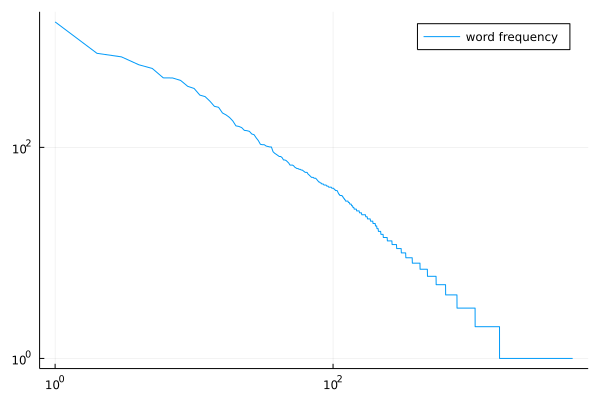

In [9]:
using Plots
plot(map(x -> x[2], sorted_word_counter), xaxis=:log, yaxis=:log, label="word frequency")

## 文字ごとにおける頻度分析

In [10]:
using StatsBase
letter_counter = StatsBase.countmap(letters)

Dict{SubString{String}, Int64} with 31 entries:
  "f" => 2384
  "c" => 3033
  "e" => 15490
  " " => 27431
  "b" => 1758
  "x" => 181
  "r" => 6666
  "h" => 7927
  "a" => 9849
  "t" => 12291
  "’" => 710
  "q" => 223
  "s" => 7281
  "z" => 80
  "i" => 8650
  "d" => 5485
  "v" => 969
  "g" => 2954
  "w" => 2976
  "y" => 2606
  "—" => 263
  "o" => 9530
  "j" => 236
  "k" => 1298
  "l" => 5223
  ⋮   => ⋮

In [11]:
using StatsBase
sorted_letter_counter = sort(collect(letter_counter), by=x->x[2], rev=true)

31-element Vector{Pair{SubString{String}, Int64}}:
 " " => 27431
 "e" => 15490
 "t" => 12291
 "a" => 9849
 "o" => 9530
 "i" => 8650
 "n" => 8077
 "h" => 7927
 "s" => 7281
 "r" => 6666
 "d" => 5485
 "l" => 5223
 "u" => 3997
     ⋮
 "p" => 1978
 "b" => 1758
 "k" => 1298
 "v" => 969
 "’" => 710
 "—" => 263
 "j" => 236
 "q" => 223
 "x" => 181
 "z" => 80
 "‘" => 46
 "ù" => 1

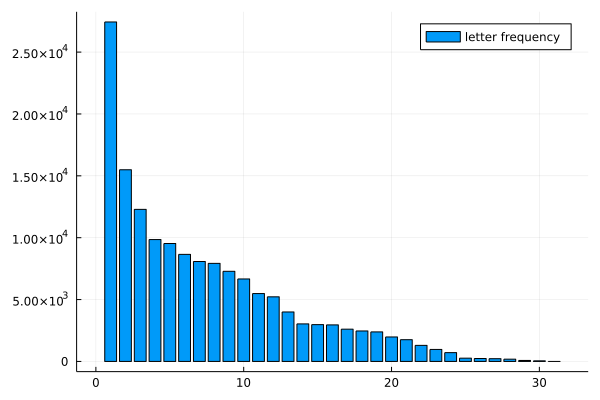

In [12]:
using Plots
plot(map(x -> x[2], sorted_letter_counter), st=:bar, label="letter frequency")

In [13]:
println(sorted_letter_counter)

Pair{SubString{String}, Int64}[" " => 27431, "e" => 15490, "t" => 12291, "a" => 9849, "o" => 9530, "i" => 8650, "n" => 8077, "h" => 7927, "s" => 7281, "r" => 6666, "d" => 5485, "l" => 5223, "u" => 3997, "c" => 3033, "w" => 2976, "g" => 2954, "y" => 2606, "m" => 2464, "f" => 2384, "p" => 1978, "b" => 1758, "k" => 1298, "v" => 969, "’" => 710, "—" => 263, "j" => 236, "q" => 223, "x" => 181, "z" => 80, "‘" => 46, "ù" => 1]


## 単語の長さと単語数の関係

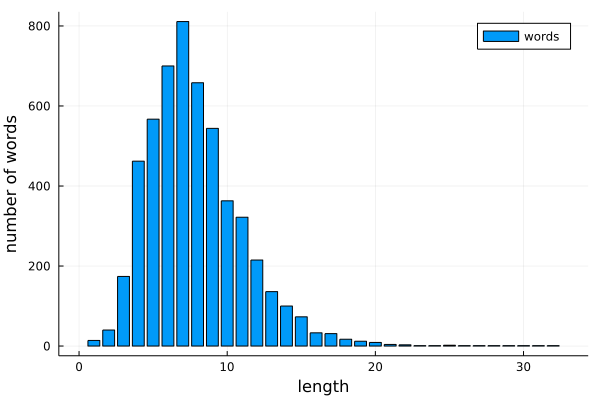

In [14]:
using Plots, StatsBase
word_length_counter = StatsBase.countmap(map(x -> length(x[1]), sorted_word_counter))
sorted_word_length_counter = sort(collect(word_length_counter))
plot(map(x -> x[2], sorted_word_length_counter), st=:bar, xlabel="length", ylabel="number of words", label="words")

In [15]:
sorted_word_length_counter

32-element Vector{Pair{Int64, Int64}}:
  1 => 14
  2 => 40
  3 => 174
  4 => 462
  5 => 567
  6 => 700
  7 => 811
  8 => 658
  9 => 544
 10 => 363
 11 => 322
 12 => 215
 13 => 136
    ⋮
 21 => 4
 22 => 3
 23 => 1
 24 => 1
 26 => 2
 27 => 1
 28 => 1
 29 => 1
 30 => 1
 31 => 1
 35 => 1
 53 => 1